In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
sns.set_style("darkgrid")


In [4]:
# Importing the dataset  
df = pd.read_csv('/Users/deogirekartik/Vscode/Technical Seminar/datset/heart_attack_prediction_dataset.csv')

In [5]:
df.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


(array([5624.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

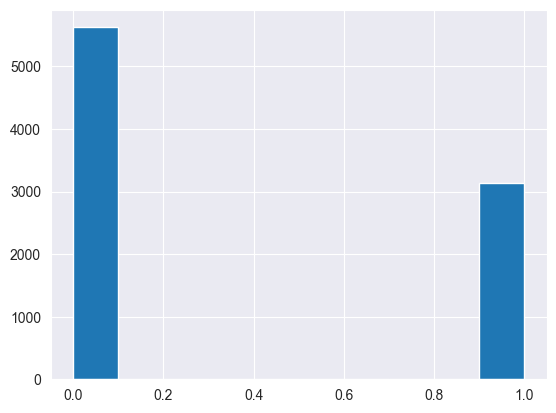

In [6]:
plt.hist(df['Heart Attack Risk'])

In [7]:
numerical_cols = [cols for cols in df.columns if df.dtypes[cols] != 'O']

In [8]:
numerical_cols

['Age',
 'Cholesterol',
 'Heart Rate',
 'Diabetes',
 'Family History',
 'Smoking',
 'Obesity',
 'Alcohol Consumption',
 'Exercise Hours Per Week',
 'Previous Heart Problems',
 'Medication Use',
 'Stress Level',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',
 'Heart Attack Risk']

<Axes: >

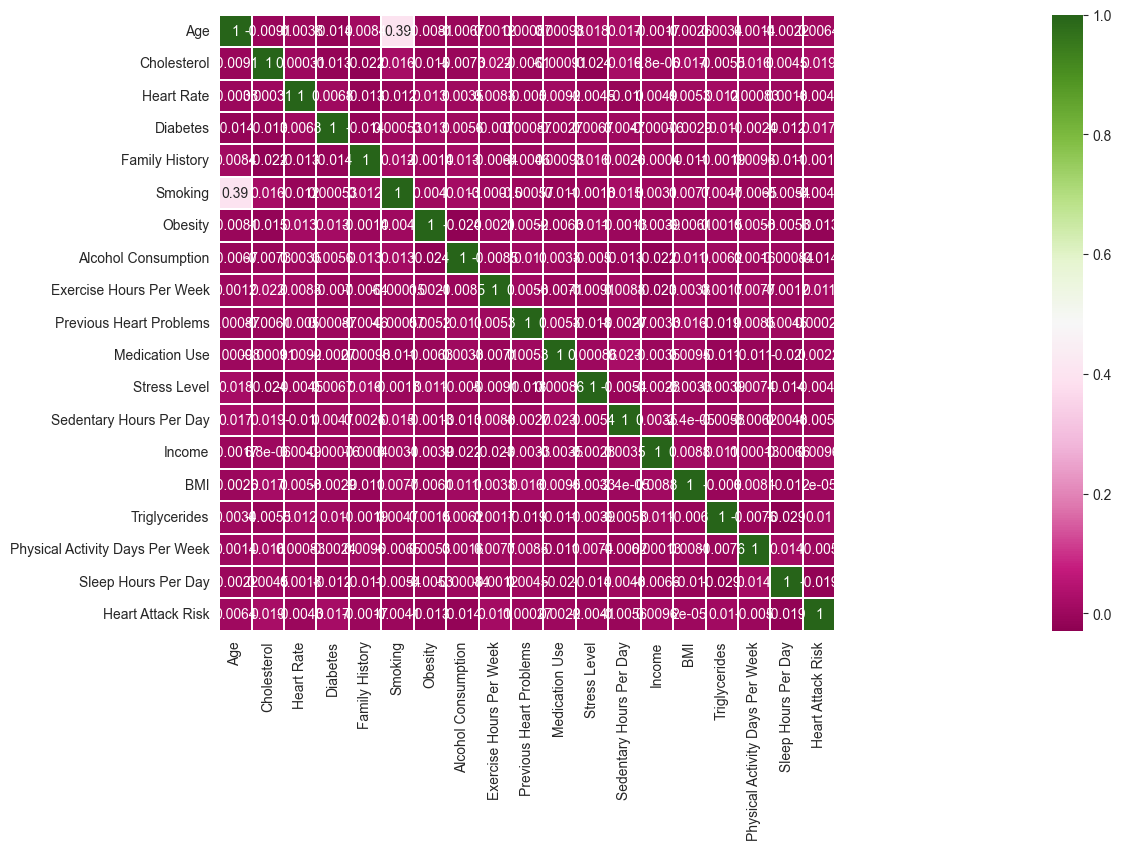

In [27]:
plt.figure(figsize=(56, 8))
corr = df.loc[:,numerical_cols].corr(method="pearson")
sns.heatmap(corr, cmap='PiYG', square=True, linewidths=.2, annot = True)
# plt.tight_layout()

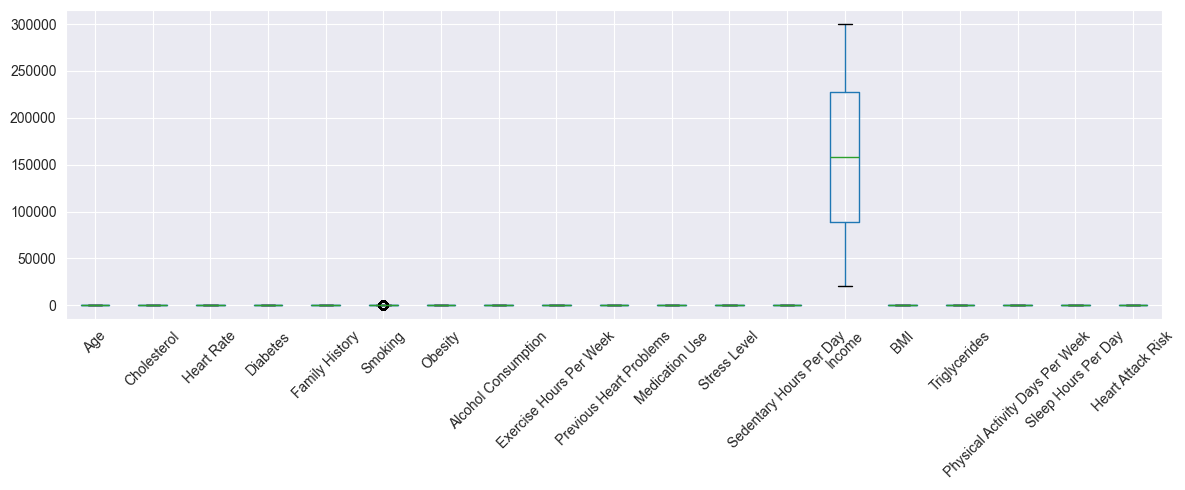

In [10]:
plt.figure(figsize=(12, 5))
df.boxplot(fontsize=10)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [11]:
#sampled_df = df.sample(n=500)
# plt.figure(figsize=(12, 5))
# sns.histplot(data=df, kde=True)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

<Axes: xlabel='BMI', ylabel='Count'>

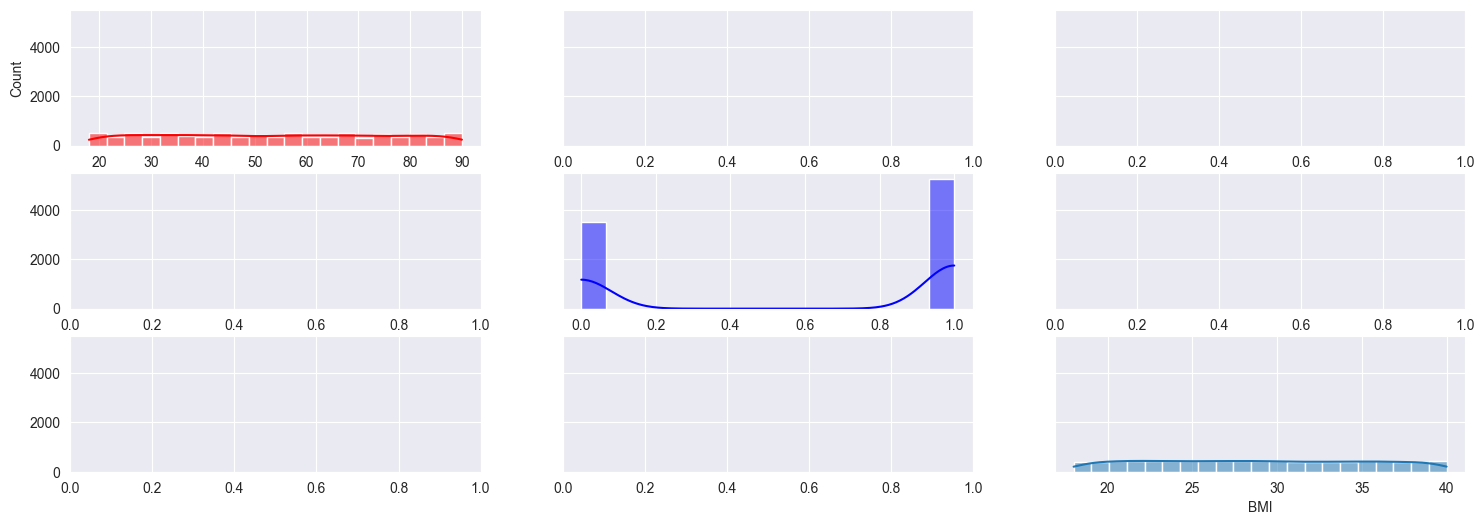

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0][0], x="Age", kde=True, color='r')
sns.histplot(df, ax=axes[1][1], x="Alcohol Consumption", kde=True, color='b')
sns.histplot(df, ax=axes[2][2], x="BMI", kde=True)

<Axes: xlabel='Diet'>

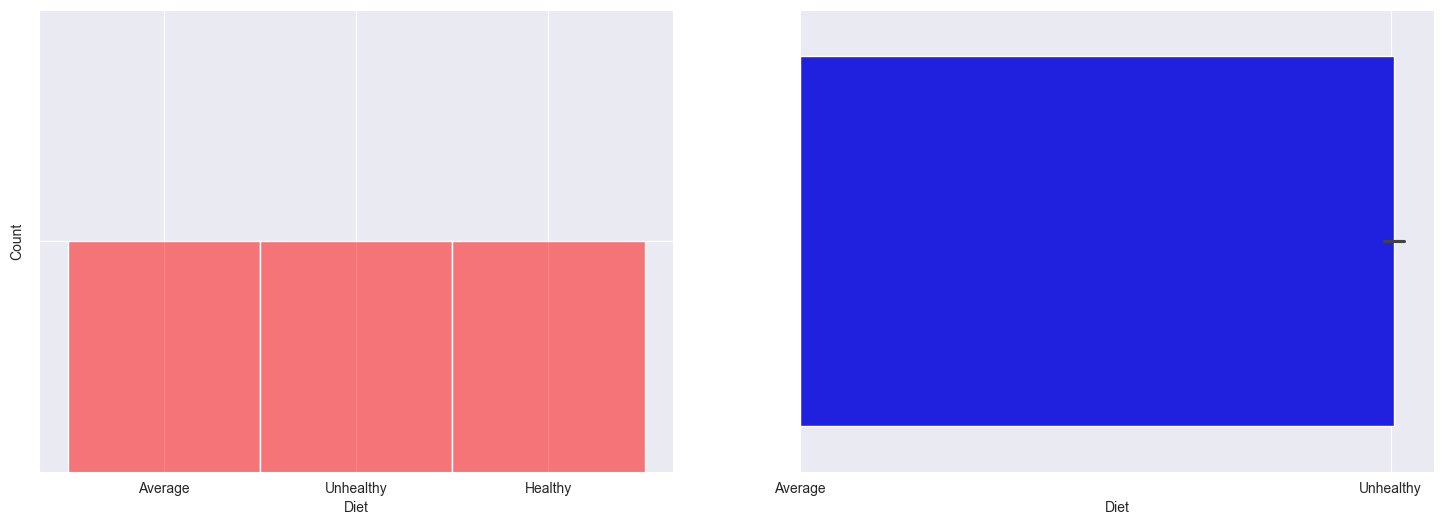

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="Diet", kde=True, color='r')
sns.barplot(df, ax=axes[1], x="Diet", color='b')

<Axes: xlabel='Diet', ylabel='Count'>

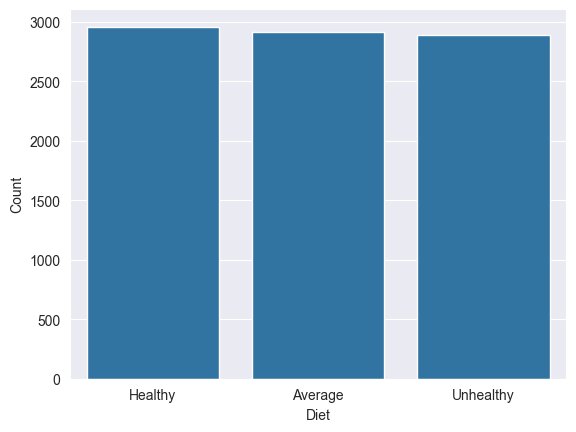

In [14]:
diet_counts = df['Diet'].value_counts().reset_index()

# Rename the columns to 'Diet' and 'Count'
diet_counts.columns = ['Diet', 'Count']

# Create a barplot using Seaborn
sns.barplot(x='Diet', y='Count', data=diet_counts)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [28]:
df.drop('Patient ID', axis = 1, inplace = True)

In [29]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk'],
      dtype='object')